In [3]:
#import 
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt 

In [4]:
#insert filepath 
crime_data = Path("Crime_Data_from_2020_to_Present.csv")
#read csv file using pandas 
crime_df = pd.read_csv(crime_data)
crime_df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [5]:
#view all columns 
crime_df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [6]:
#reduced dataframe to all neccesary column 
reduced_crime_df = crime_df.loc[:,["AREA NAME", "DATE OCC", "Crm Cd Desc"]]
reduced_crime_df.head()

,AREA NAME,DATE OCC,Crm Cd Desc
0,Southwest,01/08/2020 12:00:00 AM,BATTERY - SIMPLE ASSAULT
1,Central,01/01/2020 12:00:00 AM,BATTERY - SIMPLE ASSAULT
2,Central,02/13/2020 12:00:00 AM,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE
3,N Hollywood,01/01/2020 12:00:00 AM,VANDALISM - MISDEAMEANOR ($399 OR UNDER)
4,Mission,01/01/2020 12:00:00 AM,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA..."


In [7]:
#drop duplicate
reduced_crime_df= reduced_crime_df.drop_duplicates()

In [14]:
# Handle outliers (example: remove rows with crime count > 99th percentile)
crime_counts = reduced_crime_df[ "Crm Cd Desc"].value_counts()
threshold = crime_counts.quantile(0.99)
crime_counts_filtered = crime_counts[crime_counts <= threshold]
reduced_crime_df = reduced_crime_df[reduced_crime_df["Crm Cd Desc"].isin(crime_counts_filtered.index)]

In [15]:
#narrowing down data to just Central area and converted it into a dataframe
central_data = reduced_crime_df[reduced_crime_df["AREA NAME"]=="Central"]
central_data 

,AREA NAME,DATE OCC,Crm Cd Desc,year,month
2,Central,2020-02-13,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,2020,2
5,Central,2020-01-01,"RAPE, FORCIBLE",2020,1
6,Central,2020-01-02,SHOPLIFTING - PETTY THEFT ($950 & UNDER),2020,1
7,Central,2020-01-04,OTHER MISCELLANEOUS CRIME,2020,1
8,Central,2020-01-04,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",2020,1
...,...,...,...,...,...
712426,Central,2023-04-25,THEFT PLAIN - PETTY ($950 & UNDER),2023,4
712574,Central,2023-01-31,"DEFRAUDING INNKEEPER/THEFT OF SERVICES, $950 &...",2023,1
712617,Central,2023-03-05,OTHER MISCELLANEOUS CRIME,2023,3
712625,Central,2023-03-11,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,2023,3


In [18]:
#create df for each year from 2020-2023 
years =[2020,2021,2023]
data_by_year = {year:central_data[central_data["DATE OCC"].dt.year == year]for year in years}


Top 5 Crimes vs Years:
                                                    2020  2021  2023
BURGLARY FROM VEHICLE                                340   353   119
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VAN...   327   333   109
THEFT PLAIN - PETTY ($950 & UNDER)                   311   334   105
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT       303   329   108
ROBBERY                                              267   295   104




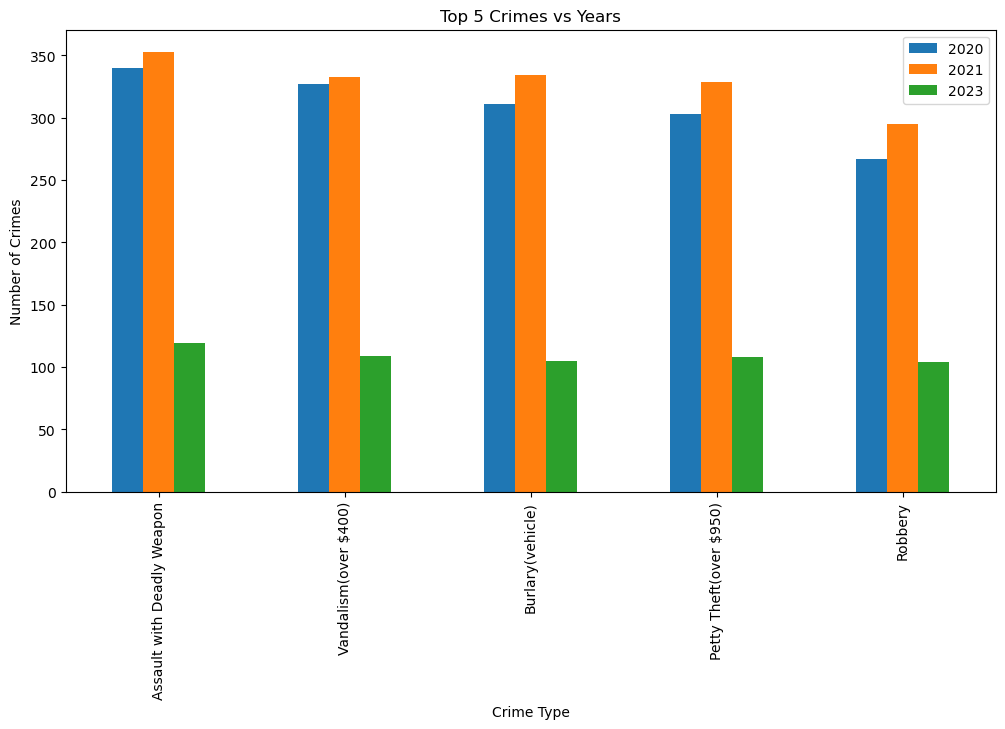

In [60]:
##Creating Visualization 
# Top 5 overall crime for the Central region vs year (Bar Chart)
top_5_crimes_overall = central_data["Crm Cd Desc"].value_counts().head(5).index.tolist()
top_5_crimes_overall

# Calculate the number of top 5 crimes by year
crime_counts_by_year = {}
for year, crimes in data_by_year.items():
    crime_counts_by_year[year] = crimes["Crm Cd Desc"].value_counts().loc[top_5_crimes_overall]

# Print the table for the bar chart
print("Top 5 Crimes vs Years:")
print(pd.DataFrame(crime_counts_by_year))
print("\n")

# Plot the bar chart
yearly_crime_counts_df = pd.DataFrame(crime_counts_by_year)
yearly_crime_counts_df.plot(kind="bar", figsize=(12, 6))

#chart properties
plt.title("Top 5 Crimes vs Years")
plt.xlabel("Crime Type")
plt.ylabel("Number of Crimes")
x_tick_labels = {'Burlary(vehicle)','Vandalism(over $400)','Petty Theft(over $950)','Assault with Deadly Weapon', 'Robbery'}
plt.gca().set_xticklabels(x_tick_labels)

#save image to PNG file
plt.savefig("Central_Year_top5.png",bbox_inches='tight')
plt.show()



Top 5 Crimes vs Month (2020 - 2022):
Crm Cd Desc  ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT  \
DATE OCC                                                      
2020-01                                                  23   
2020-02                                                  23   
2020-03                                                  24   
2020-04                                                  26   
2020-05                                                  24   
2020-06                                                  26   
2020-07                                                  27   
2020-08                                                  24   
2020-09                                                  26   
2020-10                                                  26   
2020-11                                                  25   
2020-12                                                  29   
2021-01                                                  24   
2021-02           

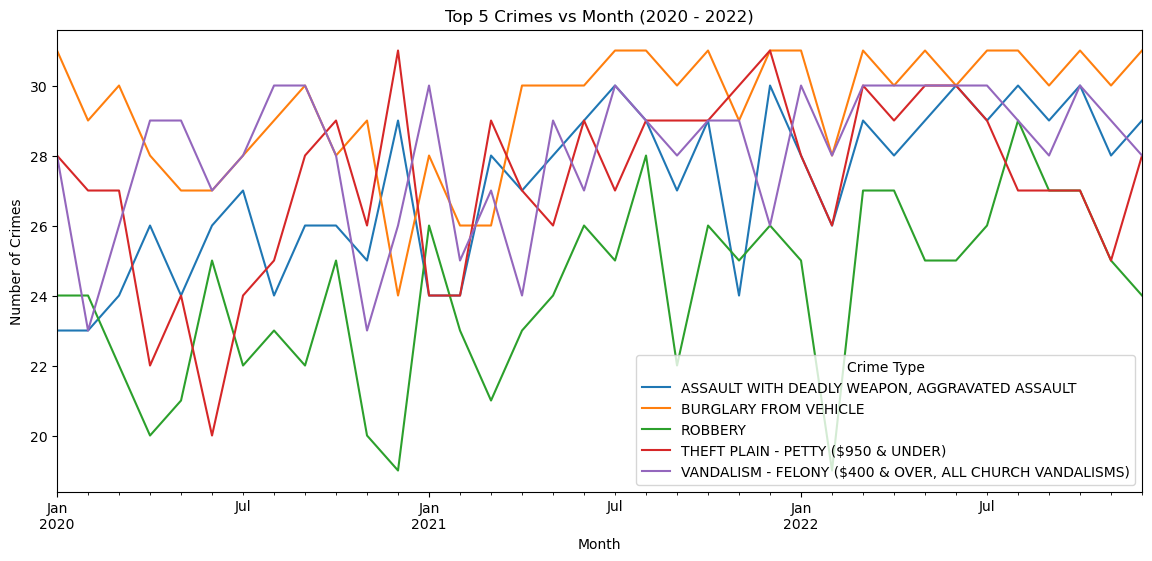

In [40]:
#Top 5 crimes vs month (Line chart)
top_5_crimes_overall = central_data["Crm Cd Desc"].value_counts().head(5).index.tolist()
top_5_crimes_data = central_data[central_data["Crm Cd Desc"].isin(top_5_crimes_overall)]

# Limit data to the end of 2020 for even comparison 
top_5_crimes_data = top_5_crimes_data[top_5_crimes_data['DATE OCC'].dt.year < 2023]
crimes_by_month = top_5_crimes_data.groupby([top_5_crimes_data["DATE OCC"].dt.to_period("M"), "Crm Cd Desc"]).size().unstack().fillna(0)

# Print the table for the line chart
print("Top 5 Crimes vs Month (2020 - 2022):")
print(crimes_by_month)
print("\n")

# Plot the line chart
fig, ax = plt.subplots(figsize=(14, 6))
crimes_by_month.plot(ax=ax)
plt.title("Top 5 Crimes vs Month (2020 - 2022)")
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.legend(title="Crime Type")

#save image to PNG file 
plt.savefig('Monthly_Top5_analysis.png')
plt.show()


Top 3 Crimes During Socioeconomic Events:
                                                    Pre-COVID  During COVID  \
BURGLARY FROM VEHICLE                                    1062         10662   
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VAN...       1011         11214   
THEFT PLAIN - PETTY ($950 & UNDER)                       1032         10142   

                                                    Post-COVID  \
BURGLARY FROM VEHICLE                                     7466   
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VAN...        8077   
THEFT PLAIN - PETTY ($950 & UNDER)                        7277   

                                                    During Inflation  \
BURGLARY FROM VEHICLE                                           5723   
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VAN...              6157   
THEFT PLAIN - PETTY ($950 & UNDER)                              5601   

                                                    Post-Inflation  
BURGLARY FROM VEHI

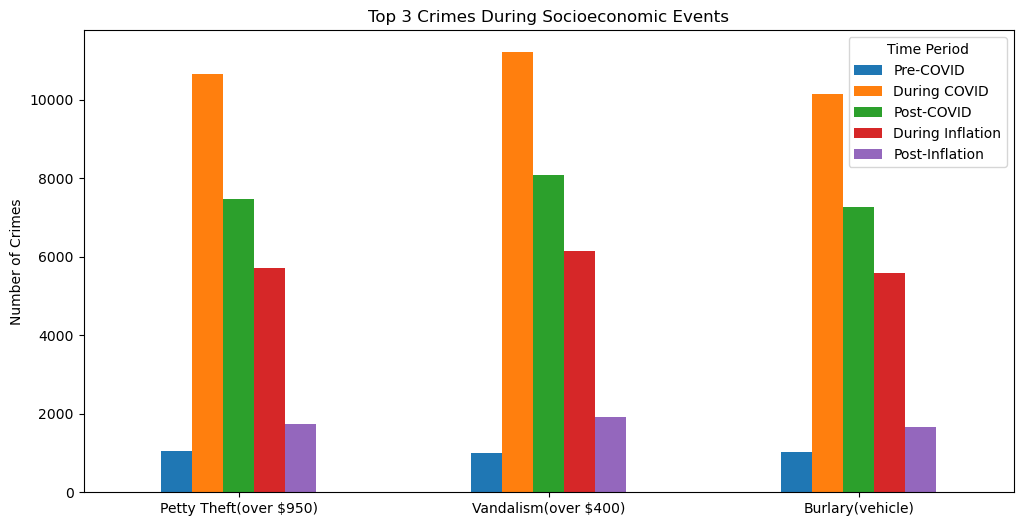

In [62]:
top_3_crimes = top_5_crimes_overall[:3]

pre_covid_period = (reduced_crime_df["DATE OCC"] < "2020-03-01")
during_covid_period = (reduced_crime_df["DATE OCC"] >= "2020-03-01") & (reduced_crime_df["DATE OCC"] <= "2021-12-31")
post_covid_period = (reduced_crime_df["DATE OCC"] > "2021-12-31")

# Adjust the inflation periods if needed
during_inflation_period = (reduced_crime_df["DATE OCC"] >= "2022-01-01") & (reduced_crime_df["DATE OCC"] <= "2022-12-31")
post_inflation_period = (reduced_crime_df["DATE OCC"] > "2022-12-31")

pre_covid_crime_counts = reduced_crime_df[pre_covid_period]["Crm Cd Desc"].value_counts().loc[top_3_crimes]
during_covid_crime_counts = reduced_crime_df[during_covid_period]["Crm Cd Desc"].value_counts().loc[top_3_crimes]
post_covid_crime_counts = reduced_crime_df[post_covid_period]["Crm Cd Desc"].value_counts().loc[top_3_crimes]

during_inflation_crime_counts = reduced_crime_df[during_inflation_period]["Crm Cd Desc"].value_counts().loc[top_3_crimes]
post_inflation_crime_counts = reduced_crime_df[post_inflation_period]["Crm Cd Desc"].value_counts().loc[top_3_crimes]


crime_counts_by_period = pd.DataFrame({
    "Pre-COVID": pre_covid_crime_counts,
    "During COVID": during_covid_crime_counts,
    "Post-COVID": post_covid_crime_counts,
    "During Inflation": during_inflation_crime_counts,
    "Post-Inflation": post_inflation_crime_counts
})


# Print the table for the bar chart
print("Top 3 Crimes During Socioeconomic Events:")
print(crime_counts_by_period)
print("\n")


ax = crime_counts_by_period.plot.bar(rot=0, figsize=(12, 6))
ax.set_ylabel("Number of Crimes")
ax.set_title("Top 3 Crimes During Socioeconomic Events")
plt.xticks(range(len(top_3_crimes)), top_3_crimes)
plt.legend(title="Time Period")

x_tick_labels = {'Burlary(vehicle)','Vandalism(over $400)','Petty Theft(over $950)'}
plt.gca().set_xticklabels(x_tick_labels)

#save figure to PNG 
plt.savefig("Top3_socialeconomic.png",bbox_inches='tight')
plt.show()